In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("/content/heart.csv")

# Step 3: Basic Info
print("Shape:", df.shape)
df.head()


Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Step 2: Train-Test Split and Model Training

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features & Target
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Logistic Regression ---
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test_scaled))

# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

# --- XGBoost ---
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

# --- Compare Accuracies ---
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")
print(f"XGBoost Accuracy: {xgb_acc*100:.2f}%")

# --- Confusion Matrix & Report (best model) ---
y_pred = xgb_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 79.51%
Random Forest Accuracy: 98.54%
XGBoost Accuracy: 98.54%

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-1907678659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


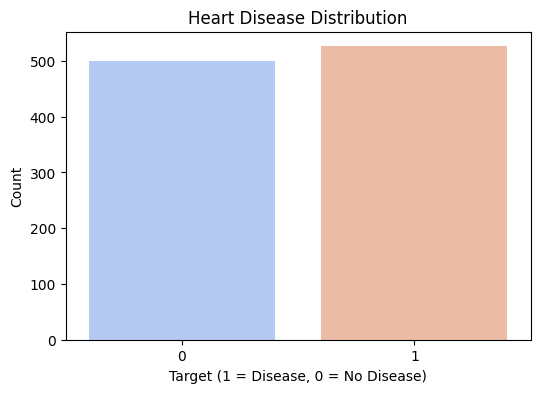

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Count of heart disease vs no disease ---
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Heart Disease Distribution')
plt.xlabel('Target (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
plt.show()

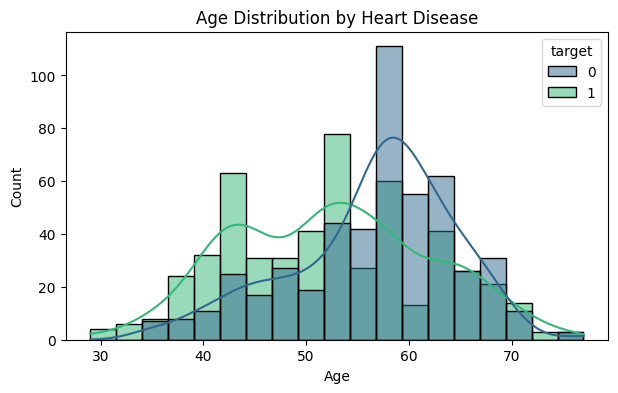

In [8]:
# --- 2️⃣ Age distribution by disease status ---
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='target', kde=True, palette='viridis')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

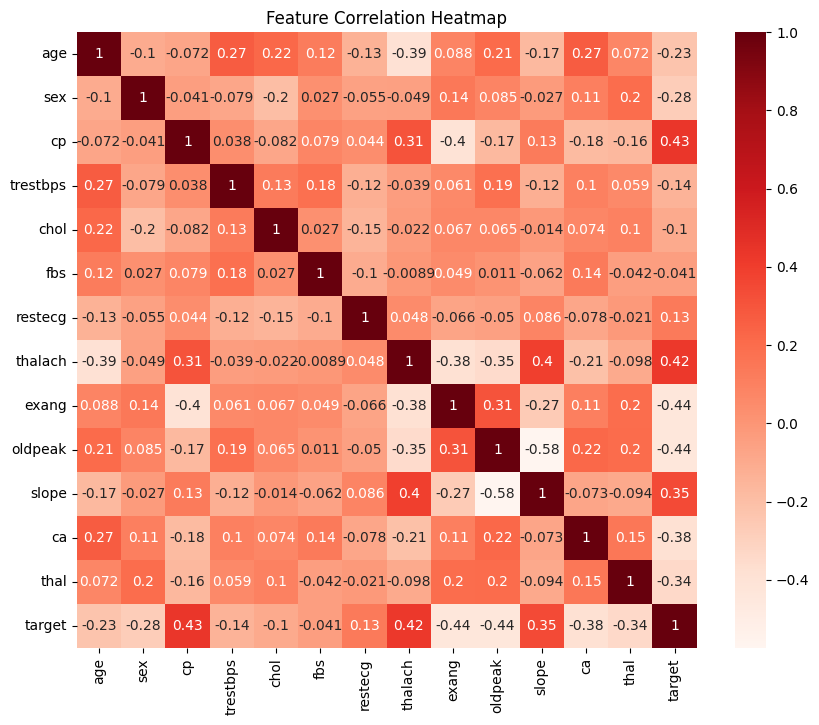

In [9]:

# --- 3️⃣ Correlation heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Feature Correlation Heatmap')
plt.show()

/tmp/ipython-input-2153520183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances, y=features, orient='h', palette='coolwarm')


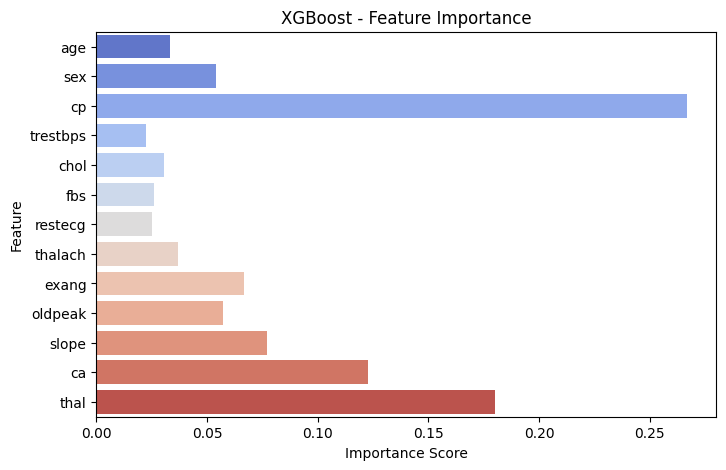

In [10]:

# --- 4️⃣ Feature importance from XGBoost ---
xgb_importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importances, y=features, orient='h', palette='coolwarm')
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [11]:
import joblib

# Save the best model (XGBoost here)
best_model = xgb_model

# Save model and scaler
joblib.dump(best_model, 'heart_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [13]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.5 MB/s eta 0:00:00


In [19]:
import streamlit as st
import joblib
import numpy as np

# --- Page Setup ---
st.set_page_config(page_title="Heart Disease Prediction", page_icon="❤️", layout="centered")

# --- Custom Page Styling ---
st.markdown("""
    <style>
    .main {
        background-color: #0E1117;
        color: white;
        padding: 20px;
    }
    h1, h2, h3 {
        text-align: center;
        color: #FF4B4B;
    }
    .stButton>button {
        background-color: #FF4B4B;
        color: white;
        border-radius: 10px;
        height: 3em;
        width: 100%;
        font-size: 18px;
    }
    .stButton>button:hover {
        background-color: #FF6B6B;
        color: black;
    }
    </style>
""", unsafe_allow_html=True)

# --- Title & Banner Image ---
st.title("❤️ AI Heart Disease Prediction App")
st.image("/content/heart.png", use_container_width=True)
st.markdown("<h4 style='text-align:center;'>Predict your heart disease risk with Machine Learning</h4>", unsafe_allow_html=True)
st.write("This web app uses AI and medical data to predict your likelihood of heart disease. *(For educational use only)*")

# --- Load Model and Scaler ---
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

# --- Input Section ---
st.header("🩺 Enter Patient Details")

col1, col2 = st.columns(2)

with col1:
    age = st.number_input("Age", min_value=1, max_value=120, value=45)
    sex = st.selectbox("Sex", ("Male", "Female"))
    cp = st.number_input("Chest Pain Type (0-3)", min_value=0, max_value=3, value=1)
    trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
    chol = st.number_input("Serum Cholesterol (mg/dl)", min_value=100, max_value=600, value=200)
    fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", ("No", "Yes"))

with col2:
    restecg = st.number_input("Resting ECG results (0-2)", min_value=0, max_value=2, value=1)
    thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220, value=150)
    exang = st.selectbox("Exercise Induced Angina", ("No", "Yes"))
    oldpeak = st.number_input("ST Depression (Oldpeak)", min_value=0.0, max_value=10.0, value=1.0)
    slope = st.number_input("Slope of Peak Exercise ST Segment (0-2)", min_value=0, max_value=2, value=1)
    ca = st.number_input("Major Vessels Colored (0-4)", min_value=0, max_value=4, value=0)
    thal = st.number_input("Thalassemia (0-3)", min_value=0, max_value=3, value=2)

# --- Convert categorical inputs ---
sex = 1 if sex == "Male" else 0
fbs = 1 if fbs == "Yes" else 0
exang = 1 if exang == "Yes" else 0

# --- Prediction Section ---
if st.button("🔍 Predict Heart Disease Risk"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[0][1]

    st.subheader("📊 Prediction Result:")
    if prediction[0] == 1:
        st.error(f"⚠️ High Risk of Heart Disease! (Probability: {probability*100:.2f}%)")
        st.markdown("<p style='color:#FF4B4B; font-size:18px;'>Please consult a cardiologist for a detailed medical checkup.</p>", unsafe_allow_html=True)
    else:
        st.success(f"✅ Low Risk of Heart Disease (Probability: {probability*100:.2f}%)")
        st.markdown("<p style='color:#00FFAA; font-size:18px;'>Keep maintaining a healthy lifestyle! 💪</p>", unsafe_allow_html=True)

# --- Footer ---
st.markdown("---")
st.markdown("<p style='text-align:center; color:gray;'>© 2025 AI Health Prediction | Built with ❤️ by Kumar GK</p>", unsafe_allow_html=True)


2025-11-08 09:16:40.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 09:16:40.371 Please replace `use_container_width` with `width`.

`use_container_width` will be removed afte

DeltaGenerator()